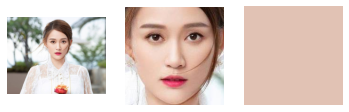

In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from colorthief import ColorThief
import os
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

filepath = input('enter the file path:')
IMAGE_FILES = [filepath]

def torgb(img):
    return(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    file = IMAGE_FILES[0]
    #print(type(file))
    img1 = cv2.imread(file)
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    # Draw face detections of each face.
    if not results.detections:
        print('no face detected')
    img2 = img1.copy()
    for detection in results.detections:
        box = detection.location_data.relative_bounding_box
        #print(box)
        #print(type(box.xmin))
        (ycor, xcor, _) = img2.shape
        x1 = (int(box.xmin * xcor))
        y1 = (int(box.ymin * ycor))
        x2 = (int((box.xmin+box.width)*xcor))
        y2 = (int((box.ymin+box.height)*ycor))
        #print(x1,x2,y1,y2)
        img3 = img2[y1:y2,x1:x2,:]
        #mp_drawing.draw_detection(img2, detection)
    #plt.imshow(img2_rgb)
    fig = plt.figure()
    fig.add_subplot(1,3,1)
    plt.axis('off')
    plt.imshow(torgb(img1))
    cv2.imwrite('crop.png', img3)
    fig.add_subplot(1,3,2)
    plt.axis('off')
    plt.imshow(torgb(img3))
    #img4 = Image.fromarray(img3)
    ct = ColorThief('crop.png')
    dominant_color = ct.get_color(quality=1)
    #print(dominant_color)
    fig.add_subplot(1,3,3)
    plt.axis('off')
    plt.imshow([[dominant_color]])
    if os.path.exists("crop.png"):
        os.remove("crop.png")